<a href="https://colab.research.google.com/github/Petercode12/House_price_prediction/blob/master/ToyProblems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso

## Import and Check out the Data


In [ ]:
#id data: 1tjyJB0DrRomOb5E5ZKoFI6azSEZIkziw
%%shell
cd /content
gdown -q --id "1tjyJB0DrRomOb5E5ZKoFI6azSEZIkziw"

In [ ]:
df = pd.read_csv("House_price.csv")
print(df.head())
print(df.tail())

   Avg. Area Income  House Age  ...  Area Population         Price
0       79545.45857   5.682861  ...      23086.80050  1.059034e+06
1       79248.64245   6.002900  ...      40173.07217  1.505891e+06
2       61287.06718   5.865890  ...      36882.15940  1.058988e+06
3       63345.24005   7.188236  ...      34310.24283  1.260617e+06
4       59982.19723   5.040555  ...      26354.10947  6.309435e+05

[5 rows x 6 columns]
      Avg. Area Income  House Age  ...  Area Population        Price
4543       84556.63627   5.092459  ...      31797.31744  1326846.699
4544       82732.98111   5.332712  ...      41136.52722  1252663.621
4545       65694.05127   6.436741  ...      43406.71203  1359762.694
4546       76061.35071   7.148713  ...      40876.96459  1778013.334
4547       66935.47508   6.376390  ...      17573.61710  1109059.054

[5 rows x 6 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
dtypes: float64(6)
memory usage: 213.3 KB


### Check Null values

In [ ]:
Total_null_values = df.isnull().sum().sum()
print(Total_null_values)

0


In [ ]:
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,3.981693,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,1.230939,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150193,5.332187,6.299692,3.140000,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,4.050000,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,4.490000,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06


## Data Visualization

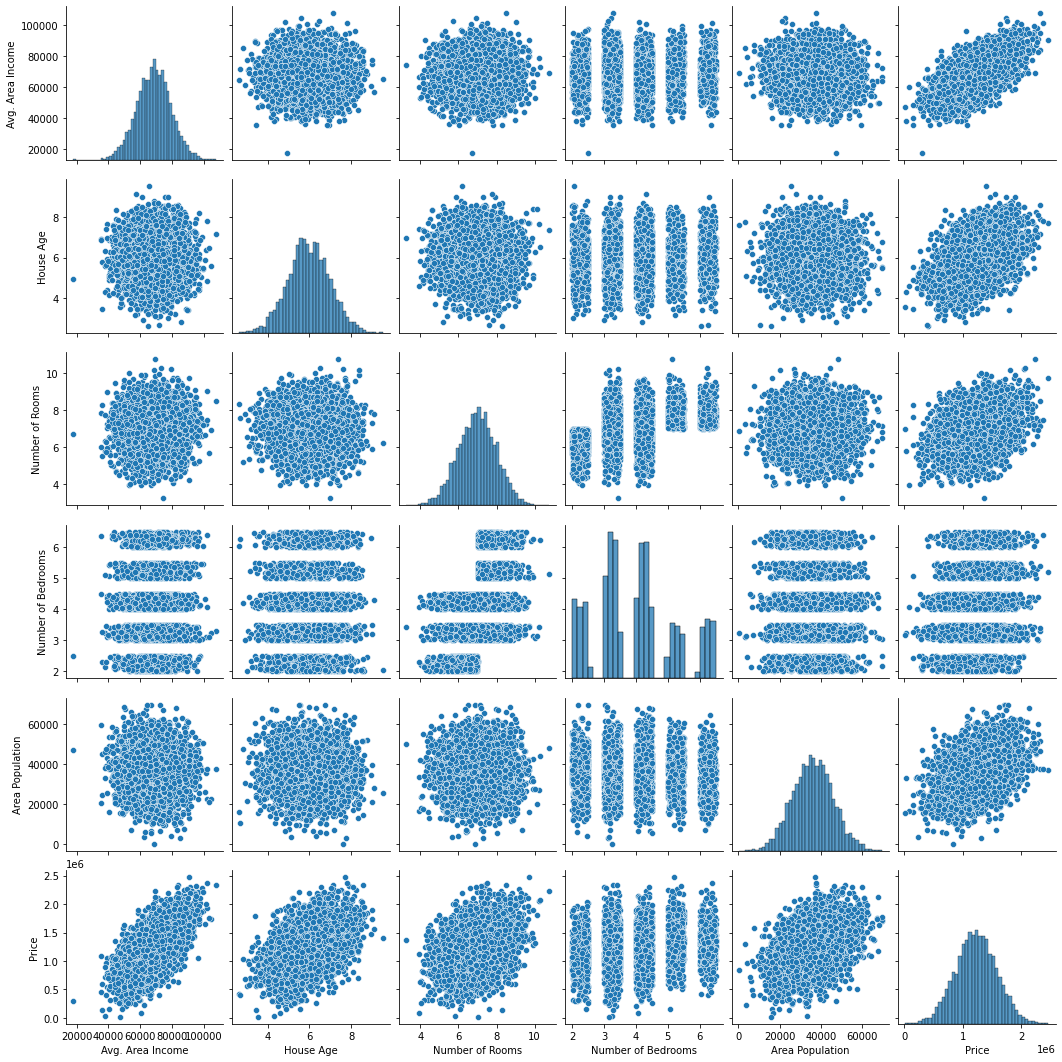

In [ ]:
sns.pairplot(df)

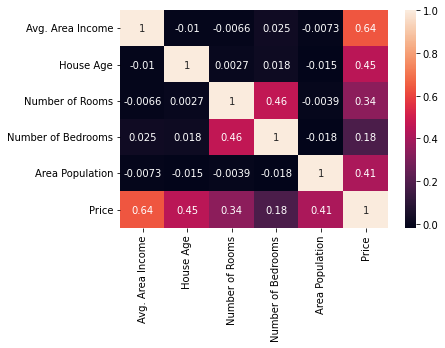

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## Preprocessing Data (Standardlize)

### Saperate Data

In [ ]:
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X)
print('---------------------------------------------------------')
print(y)

[[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
  2.30868005e+04]
 [7.92486424e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00
  4.01730722e+04]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00
  3.68821594e+04]
 ...
 [6.56940513e+04 6.43674058e+00 6.70492911e+00 3.14000000e+00
  4.34067120e+04]
 [7.60613507e+04 7.14871312e+00 7.54606599e+00 6.30000000e+00
  4.08769646e+04]
 [6.69354751e+04 6.37638969e+00 8.51382556e+00 5.47000000e+00
  1.75736171e+04]]
---------------------------------------------------------
[1059033.558 1505890.915 1058987.988 ... 1359762.694 1778013.334
 1109059.054]


**Train Model**

In [ ]:
model = Lasso(alpha = 1.0)
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[2.16097189e+01 1.65340720e+05 1.21144120e+05 1.45813312e+03
 1.51882376e+01]
-2639264.384782524


In [ ]:
test_X = np.array([79545.45857, 5.6828, 7, 4, 23086.8])
print(model.predict([test_X]))

[1223778.02878525]


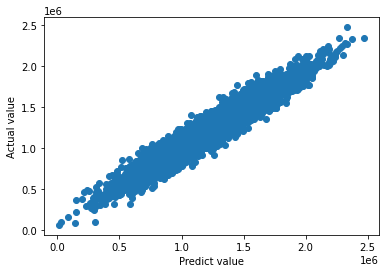

In [ ]:
actual = y
predict = model.predict(X)
plt.figure()
plt.scatter(actual, predict)
plt.xlabel('Predict value')
plt.ylabel('Actual value')
plt.show()

**Export the model**

In [ ]:
#export model
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
#export columns
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))